In [13]:
!pip3 install numpy==1.21.5

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 52.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3


In [1]:
%matplotlib inline
# from pycocotools.coco import COCO
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

import ast
import cv2
import skimage

from skimage.feature import hog, daisy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# #arr_0 is labels, arr_1 is images, arr_2 is hog features
# with np.load('data.npz') as data:
#     labels = data['arr_0']
#     imgs = data['arr_1']
#     hog_feats = data['arr_2']

In [3]:
np.version.full_version

'1.21.5'

In [18]:
#arr_0 is labels, arr_1 is images, arr_2 is hog features
with np.load('data.npz') as data:
    labels = data['arr_0']
    imgs = data['arr_1']
    hog_feats = data['arr_2']

In [5]:
labels.shape

(2966,)

In [6]:
imgs.shape

(2966, 128, 128)

In [7]:
hog_feats.shape

(2966, 128, 128)

In [8]:
tsne = TSNE(perplexity=7).fit_transform(imgs.reshape(imgs.shape[0], imgs.shape[1]**2))
pca = PCA(n_components=2).fit_transform(tsne)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
daisy_feats, daisy_ims = daisy(imgs[-1], visualize=True, step = 180, radius = 20)

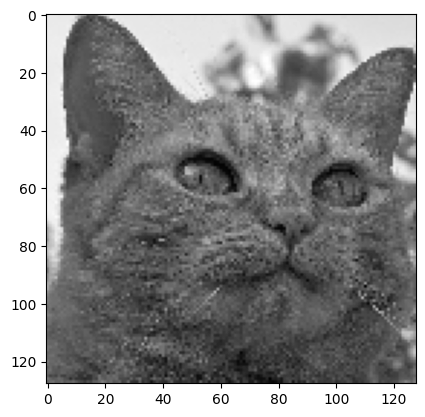

In [44]:
plt.imshow(imgs[-1], cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


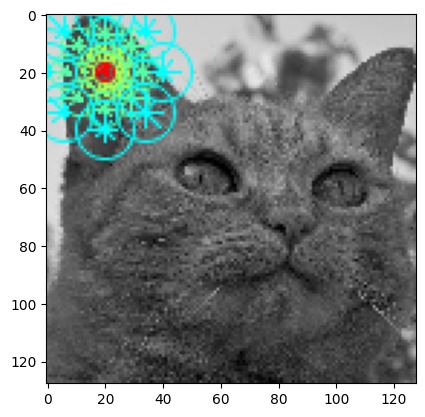

In [45]:
plt.imshow(daisy_ims, cmap ="gray")

In [8]:
hog_feats = hog_feats.reshape(hog_feats.shape[0],hog_feats.shape[1]*hog_feats.shape[2])
hog_feats.shape

(2966, 16384)

In [9]:
# def extract_hog_features(data):
#     num_samples = data.shape[0]
#     hog_features = []
#     for i in range(num_samples):
#         img = data[i]
#         feature = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3))
#         hog_features.append(feature)
#     return np.array(hog_features)

In [10]:
images = imgs.reshape(imgs.shape[0],imgs.shape[1]*imgs.shape[2])
images.shape

(2966, 16384)

In [11]:
# #split train and test
# x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
#downsample to fix class imbalance


In [13]:
# clf = MLPClassifier(solver ='adam',
#                    activation = 'relu',
#                    alpha = 0.001,
#                    hidden_layer_sizes = (512,128,10),
#                    random_state = 1,
#                    max_iter = 100,
#                    verbose = True)

In [14]:
# clf.fit(x_train, y_train)

In [15]:
# y_pred = clf.predict(x_test)

In [16]:
# print(classification_report(y_test,y_pred))

In [17]:
# clf_svc = SVC(kernel = 'rbf',
#               class_weight = 'balanced',
#               random_state = 1,
#               max_iter = 20,
#               verbose = True)

In [18]:
# clf_svc.fit(x_train,y_train)

In [19]:
# y_pred_svc = clf_svc.predict(x_test)

In [20]:
# print(classification_report(y_test,y_pred_svc))

### Canny Edge Detection

In [21]:
# imgs[0]

In [22]:
canny_feats = np.zeros(imgs.shape)
for im in range(0,imgs.shape[0]):
    edges = cv2.Canny(np.uint8(imgs[im]*255),100,200)
    canny_feats[im,:,:] = edges

In [23]:
canny_feats.shape

(2966, 128, 128)

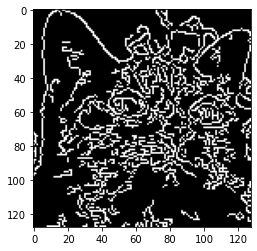

In [37]:
plt.imshow(canny_feats[-1], cmap="gray")
plt.savefig("./281 Final Report/cat_canny.png")

In [24]:
canny_ = canny_feats.reshape(canny_feats.shape[0], canny_feats.shape[1]*canny_feats.shape[2])
canny_.shape

(2966, 16384)

### Test HOG and Canny Features

In [25]:
feats = np.concatenate([hog_feats,canny_], axis = 1)

In [30]:
def train_model(features, labels = labels, model_type = 'mlp'):
    
    x_train,x_test,y_train,y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
    
    if model_type == 'mlp' or 'all':
        clf = MLPClassifier(solver ='lbfgs',
                       activation = 'relu',
                       alpha = 50,
                       hidden_layer_sizes = (128,5),
                       random_state = 1,
                       max_iter = 500,
                       early_stopping = True,
                       verbose = True)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print('-'*30)
        print('MLP Results:')
        print(classification_report(y_test,y_pred))
        
        train_acc = clf.score(x_train, y_train)
        test_acc = clf.score(x_test, y_test)
        print(f"Train Accuracy: {train_acc}")
        print(f"Test Accuracy: {test_acc}")
    if model_type == 'all':
        print('-'*30)
        print('-'*30)
    if model_type == 'svc' or 'all':
        clf_svc = make_pipeline(StandardScaler(), SVC(kernel = 'rbf',
#                   class_weight = 'balanced',
                  random_state = 1,
                  max_iter = 100,
                  verbose = True))
        clf_svc.fit(x_train,y_train)
        y_pred_svc = clf_svc.predict(x_test)
        print('SVC Results:')
        print(classification_report(y_test,y_pred_svc))

        train_acc = clf.score(x_train, y_train)
        test_acc = clf.score(x_test, y_test)
        print(f"Train Accuracy: {train_acc}")
        print(f"Test Accuracy: {test_acc}")

In [31]:
#hog features
train_model(hog_feats, model_type = 'all')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      2097955     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46525D+00    |proj g|=  1.68017D-01


 This problem is unconstrained.



At iterate    1    f=  5.05326D+00    |proj g|=  8.54428D-02

At iterate    2    f=  3.99776D+00    |proj g|=  6.90545D-02

At iterate    3    f=  1.94294D+00    |proj g|=  1.20009D-01

At iterate    4    f=  1.73072D+00    |proj g|=  2.74725D-01

At iterate    5    f=  1.70112D+00    |proj g|=  1.91019D-01

At iterate    6    f=  1.66977D+00    |proj g|=  1.01189D-01

At iterate    7    f=  1.65701D+00    |proj g|=  9.05027D-02

At iterate    8    f=  1.64971D+00    |proj g|=  4.56197D-02

At iterate    9    f=  1.64366D+00    |proj g|=  3.59087D-02

At iterate   10    f=  1.62102D+00    |proj g|=  4.76095D-02

At iterate   11    f=  1.59428D+00    |proj g|=  2.98164D-02

At iterate   12    f=  1.57803D+00    |proj g|=  2.54775D-02

At iterate   13    f=  1.57315D+00    |proj g|=  2.56790D-02

At iterate   14    f=  1.56781D+00    |proj g|=  2.77702D-02

At iterate   15    f=  1.55986D+00    |proj g|=  2.26647D-02

At iterate   16    f=  1.55167D+00    |proj g|=  1.56252D-02

At iter

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -146.245283, rho = -0.184748
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -143.786505, rho = -0.108652
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -176.378800, rho = -0.172786
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -169.700098, rho = -0.249601
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -152.737832, rho = -0.068828
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -149.717362, rho = 0.082141
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -152.093772, rho = -0.038469
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -142.264724,

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.42      0.35      0.38       156
          17       0.29      0.24      0.26        89
          18       0.36      0.29      0.32        87
          27       0.54      0.48      0.51       140
          64       0.34      0.55      0.42       122

    accuracy                           0.40       594
   macro avg       0.39      0.38      0.38       594
weighted avg       0.40      0.40      0.39       594

Train Accuracy: 0.4272062956717257
Test Accuracy: 0.3501683501683502


In [32]:
#canny features
train_model(canny_, model_type = 'all')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      2097955     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77404D+01    |proj g|=  4.49120D+01



 This problem is unconstrained.


At iterate    1    f=  5.53637D+00    |proj g|=  3.73237D-01

At iterate    2    f=  5.52561D+00    |proj g|=  2.03121D-01

At iterate    3    f=  5.49934D+00    |proj g|=  1.74582D-01

At iterate    4    f=  5.47057D+00    |proj g|=  1.73337D-01

At iterate    5    f=  5.45138D+00    |proj g|=  1.71468D-01

At iterate    6    f=  5.44457D+00    |proj g|=  1.70318D-01

At iterate    7    f=  5.25518D+00    |proj g|=  1.35563D-01

At iterate    8    f=  3.94697D+00    |proj g|=  3.15434D+00

At iterate    9    f=  3.45837D+00    |proj g|=  7.73160D-01

At iterate   10    f=  3.39479D+00    |proj g|=  7.66451D-01

At iterate   11    f=  3.32812D+00    |proj g|=  4.06486D-01

At iterate   12    f=  3.32287D+00    |proj g|=  4.05740D-01

At iterate   13    f=  3.31041D+00    |proj g|=  2.59780D-01

At iterate   14    f=  3.30849D+00    |proj g|=  7.17071D-01

At iterate   15    f=  3.29002D+00    |proj g|=  6.15240D-01

At iterate   16    f=  3.22618D+00    |proj g|=  4.45140D-01

At itera

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.32      0.28      0.30       156
          17       0.22      0.12      0.16        89
          18       0.31      0.33      0.32        87
          27       0.36      0.38      0.37       140
          64       0.28      0.38      0.32       122

    accuracy                           0.31       594
   macro avg       0.30      0.30      0.29       594
weighted avg       0.30      0.31      0.30       594

Train Accuracy: 0.9786396852164138
Test Accuracy: 0.30808080808080807
------------------------------
------------------------------
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -137.101075, rho = -0.062725
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -131.913523, rho = -0.055208
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.23      0.17      0.19       156
          17       0.21      0.15      0.17        89
          18       0.20      0.18      0.19        87
          27       0.31      0.24      0.27       140
          64       0.23      0.43      0.30       122

    accuracy                           0.24       594
   macro avg       0.24      0.23      0.23       594
weighted avg       0.24      0.24      0.23       594

Train Accuracy: 0.9786396852164138
Test Accuracy: 0.30808080808080807


In [33]:
#both hog + canny
train_model(feats, model_type = 'all')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      4195107     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98086D+01    |proj g|=  4.48089D+01


 This problem is unconstrained.



At iterate    1    f=  2.84237D+01    |proj g|=  2.40132D+02

At iterate    2    f=  6.36799D+00    |proj g|=  5.14602D+00

At iterate    3    f=  6.23145D+00    |proj g|=  3.93107D+00

At iterate    4    f=  5.84335D+00    |proj g|=  1.15736D+00

At iterate    5    f=  5.67461D+00    |proj g|=  4.73980D-01

At iterate    6    f=  5.53406D+00    |proj g|=  1.40737D-01

At iterate    7    f=  5.47757D+00    |proj g|=  1.43349D-01

At iterate    8    f=  5.45850D+00    |proj g|=  1.43239D-01

At iterate    9    f=  5.45014D+00    |proj g|=  1.43477D-01

At iterate   10    f=  5.44429D+00    |proj g|=  1.43147D-01

At iterate   11    f=  5.43214D+00    |proj g|=  1.40477D-01

At iterate   12    f=  5.27047D+00    |proj g|=  1.11988D-01

At iterate   13    f=  3.99848D+00    |proj g|=  2.80031D-01

At iterate   14    f=  3.78108D+00    |proj g|=  1.77140D-01

At iterate   15    f=  3.72376D+00    |proj g|=  1.74824D-01

At iterate   16    f=  3.04050D+00    |proj g|=  1.18566D-01

At iter

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

Train Accuracy: 0.6975829117481731
Test Accuracy: 0.25084175084175087
------------------------------
------------------------------
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -135.562875, rho = -0.066190
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -131.686718, rho = -0.077214
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -177.685782, rho = -0.101216
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -169.589191, rho = -0.216934
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -132.710926, rho = -0.036792
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -137.931301, rho = 0.096332
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -137.1585

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.32      0.22      0.26       156
          17       0.26      0.21      0.24        89
          18       0.30      0.29      0.29        87
          27       0.56      0.14      0.22       140
          64       0.25      0.62      0.36       122

    accuracy                           0.29       594
   macro avg       0.34      0.30      0.27       594
weighted avg       0.35      0.29      0.27       594

Train Accuracy: 0.6975829117481731
Test Accuracy: 0.25084175084175087


In [56]:
hog_feats = hog_feats.reshape(2966, 128*128)
feats = np.concatenate([hog_feats,pca], axis = 1)

In [57]:
train_model(feats, model_type="svc")

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      2098211     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37148D+00    |proj g|=  3.65742D-01

At iterate    1    f=  5.34609D+00    |proj g|=  4.05061D-01

At iterate    2    f=  5.33357D+00    |proj g|=  1.99829D-01

At iterate    3    f=  5.31833D+00    |proj g|=  1.71866D-01

At iterate    4    f=  5.30868D+00    |proj g|=  1.73525D-01

At iterate    5    f=  5.29504D+00    |proj g|=  3.13638D-01

At iterate    6    f=  5.27872D+00    |proj g|=  3.82186D-01

At iterate    7    f=  5.25678D+00    |proj g|=  2.91910D-01

At iterate    8    f=  5.17835D+00    |proj g|=  4.76480D-01

At iterate    9    f=  5.10159D+00    |proj g|=  9.37415D-01

At iterate   10    f=  5.02945D+00    |proj g|=  4.67451D-01

At iterate   11    f=  4.84435D+00    |proj g|=  5.39409D-01

At iterate   12    f=  4.22141D+00    |proj g|=  3.28393D+00

At iterate   13    f=  3.8

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.43      0.40      0.42       156
          17       0.00      0.00      0.00        89
          18       0.31      0.20      0.24        87
          27       0.45      0.67      0.54       140
          64       0.34      0.51      0.40       122

    accuracy                           0.40       594
   macro avg       0.31      0.36      0.32       594
weighted avg       0.33      0.40      0.35       594

Train Accuracy: 0.4266441821247892
Test Accuracy: 0.39730639730639733
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -146.415738, rho = -0.154196
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -143.939203, rho = -0.162811
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -176.154042, rho = -0.145809
nSV = 200, nBSV = 200
WA

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.42      0.32      0.36       156
          17       0.26      0.24      0.25        89
          18       0.34      0.28      0.30        87
          27       0.55      0.13      0.21       140
          64       0.26      0.62      0.37       122

    accuracy                           0.32       594
   macro avg       0.36      0.32      0.30       594
weighted avg       0.38      0.32      0.30       594

Train Accuracy: 0.4266441821247892
Test Accuracy: 0.39730639730639733
